In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import os 
from datetime import timedelta
path  = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_10


In [57]:
retail_clean = pd.read_csv('retail_clean.csv'.format(path))

In [58]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [59]:
retail_clean.InvoiceDate

0         2009-12-01 07:45:00
1         2009-12-01 07:45:00
2         2009-12-01 07:45:00
3         2009-12-01 07:45:00
4         2009-12-01 07:45:00
                 ...         
779490    2011-12-09 12:50:00
779491    2011-12-09 12:50:00
779492    2011-12-09 12:50:00
779493    2011-12-09 12:50:00
779494    2011-12-09 12:50:00
Name: InvoiceDate, Length: 779495, dtype: object

In [60]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])

In [61]:
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime("%Y-%m-%d")

In [62]:
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

In [63]:
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['year'] = retail_clean.date.dt.year
retail_clean['week'] = retail_clean.date.dt.week

ipykernel_launcher:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [64]:
retail_clean.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date',
       'month', 'year', 'week'],
      dtype='object')

In [65]:
retail_clean.month.describe()

count    779495.000000
mean          7.417110
std           3.422346
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          12.000000
Name: month, dtype: float64

In [66]:
time_series = retail_clean.groupby(['week', 'year']).agg(date=('date', 'first'), total_sales=('Quantity', np.sum)).reset_index().sort_values('date')

<AxesSubplot:xlabel='date', ylabel='total_sales'>

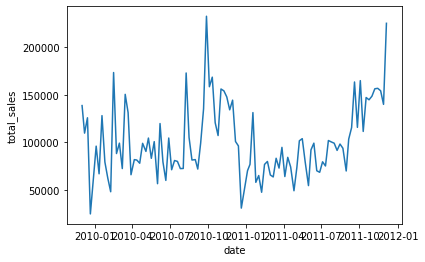

In [67]:
sns.lineplot(x='date', y='total_sales', data=time_series)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
time_series['trend'] = range(time_series.shape[0])

In [70]:
time_series['trend']

96       0
99       1
101      2
103      3
0        4
      ... 
89      99
91     100
93     101
95     102
98     103
Name: trend, Length: 104, dtype: int64

In [71]:
time_series['month'] = time_series['date'].dt.month

In [72]:
X = time_series.drop(['week', 'year', 'date', 'total_sales'], axis=1)

In [73]:
X

,trend,month
96,0,12
99,1,12
101,2,12
103,3,12
0,4,1
...,...,...
89,99,11
91,100,11
93,101,11
95,102,11


In [74]:
names = pd.get_dummies(X).columns

In [75]:
names

Index(['trend', 'month'], dtype='object')

In [76]:
X = pd.get_dummies(X).values

In [77]:
X

array([[  0,  12],
       [  1,  12],
       [  2,  12],
       [  3,  12],
       [  4,   1],
       [  5,   1],
       [  6,   1],
       [  7,   1],
       [  8,   2],
       [  9,   2],
       [ 10,   2],
       [ 11,   2],
       [ 12,   3],
       [ 13,   3],
       [ 14,   3],
       [ 15,   3],
       [ 16,   3],
       [ 17,   4],
       [ 18,   4],
       [ 19,   4],
       [ 20,   4],
       [ 21,   5],
       [ 22,   5],
       [ 23,   5],
       [ 24,   5],
       [ 25,   6],
       [ 26,   6],
       [ 27,   6],
       [ 28,   6],
       [ 29,   6],
       [ 30,   7],
       [ 31,   7],
       [ 32,   7],
       [ 33,   7],
       [ 34,   8],
       [ 35,   8],
       [ 36,   8],
       [ 37,   8],
       [ 38,   8],
       [ 39,   9],
       [ 40,   9],
       [ 41,   9],
       [ 42,   9],
       [ 43,  10],
       [ 44,  10],
       [ 45,  10],
       [ 46,  10],
       [ 47,  11],
       [ 48,  11],
       [ 49,  11],
       [ 50,  11],
       [ 51,  11],
       [ 52,

In [78]:
y = time_series.total_sales.values

In [79]:
model = LinearRegression()

In [80]:
model.fit(X,y)

LinearRegression()

In [81]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [82]:
model.coef_

array([  66.99061158, 5054.82616716])

In [83]:
dict1 = list(zip(names, model.coef_))

In [84]:
dict1

[('trend', 66.99061157654866), ('month', 5054.826167160105)]

In [85]:
prediction = model.predict(X)

In [86]:
prediction

array([125589.07550011, 125656.06611169, 125723.05672326, 125790.04733484,
        70253.95010766,  70320.94071923,  70387.93133081,  70454.92194239,
        75576.73872112,  75643.7293327 ,  75710.71994428,  75777.71055585,
        80899.52733459,  80966.51794617,  81033.50855774,  81100.49916932,
        81167.4897809 ,  86289.30655963,  86356.29717121,  86423.28778278,
        86490.27839436,  91612.0951731 ,  91679.08578467,  91746.07639625,
        91813.06700783,  96934.88378656,  97001.87439814,  97068.86500972,
        97135.85562129,  97202.84623287, 102324.66301161, 102391.65362318,
       102458.64423476, 102525.63484634, 107647.45162507, 107714.44223665,
       107781.43284823, 107848.4234598 , 107915.41407138, 113037.23085012,
       113104.22146169, 113171.21207327, 113238.20268485, 118360.01946358,
       118427.01007516, 118494.00068674, 118560.99129831, 123682.80807705,
       123749.79868863, 123816.7893002 , 123883.77991178, 123950.77052336,
       129072.58730209, 1

In [87]:
time_series['prediction'] = prediction

In [88]:
import matplotlib.pyplot as plt

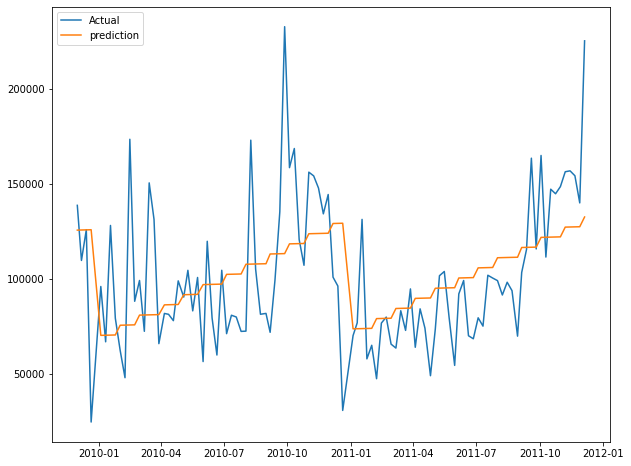

In [89]:
plt.figure(figsize=(10,8))
plt.plot(time_series.date, time_series.total_sales, label='Actual')
plt.plot(time_series.date, time_series.prediction, label='prediction')
plt.legend(loc='upper left')
plt.show()

In [118]:
####forecasting

time_series=retail_clean.groupby(['week', 'month', 'year']).agg(date = ('date', 'first'), total_sales=('Quantity', np.sum)).reset_index().sort_values('date')

In [119]:
max_date = time_series.date.max()

In [120]:
max_date

Timestamp('2011-12-05 00:00:00')

In [121]:
from dateutil.relativedelta import relativedelta

# predict_range_date = max_date + timedelta(days=5)
predict_range_date = max_date + relativedelta(weeks=32)

In [122]:
print(str(predict_range_date.date()))

2012-07-16


In [123]:
dates = pd.DataFrame({'date': pd.date_range(str(max_date.date()), str(predict_range_date.date()), freq='W')})
# dates= pd.DataFrame({'date':pd.date_range('2011-12-12','2012-08-5',freq='W')})


In [124]:
time_series = pd.concat([time_series, dates], axis=0)

In [134]:
time_series['trend'] = range(time_series.shape[0])
time_series['month'] = time_series['date'].dt.month
# time_series['month'] = time_series['month'].astype('category')

In [135]:
X = time_series.drop(['week', 'year', 'date','total_sales'], axis=1)

In [136]:
X = X[['trend', 'month']]

In [137]:
names = pd.get_dummies(X).columns

In [138]:
X = pd.get_dummies(X).values

In [139]:
y = time_series.total_sales.values

In [140]:
X

array([[  0,   0,   0, ...,   0,   0,   1],
       [  1,   0,   0, ...,   0,   0,   1],
       [  2,   0,   0, ...,   0,   0,   1],
       ...,
       [150,   0,   0, ...,   0,   0,   0],
       [151,   0,   0, ...,   0,   0,   0],
       [152,   0,   0, ...,   0,   0,   0]])

In [132]:
prediction = model.predict(X)

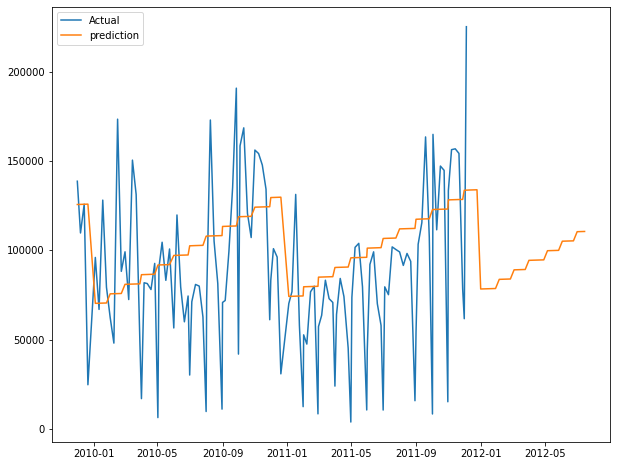

In [133]:

time_series['prediction']= prediction

plt.figure(figsize=(10,8))
plt.plot(time_series.date,time_series.total_sales,label='Actual')
plt.plot(time_series.date,time_series.prediction,label='prediction')
plt.legend(loc='upper left')
plt.show()
